## 导入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## 装载训练数据

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### 查看训练集中的例子

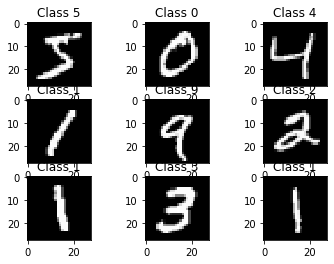

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## 格式化训练数据
对于每一个训练样本, 我们的神经网络的到单个的数组
- 先将28*28的图片变形成784长度的向量

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


- 再将输入从[0,255]压缩到[0,1]
> 将目标矩阵变成one-hot编码
>
> 0 -> [1,0,0,0,0,0,0,0,0]
>
> 1 -> [0,1,0,0,0,0,0,0,0]
>
> 2 -> [0,0,1,0,0,0,0,0,0]
>
> etc.

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## 搭建神经网络
### 搭建三层全相连网络
<img src="https://upload-images.jianshu.io/upload_images/12014150-db9f8bbfa9a48a3a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"/>

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

W0730 21:33:54.419959 4661740992 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 21:33:54.436918 4661740992 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 21:33:54.439224 4661740992 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 21:33:54.453008 4661740992 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:13

### 编译模型
- 损失函数: 分类交叉熵(用于比较两个概率分布函数)
    - 预测是个不同数字的概率分布, 目标是一个概率分布, 正确类别为100%, 其他所有类别为0
    - 例如, 80%认为这个图片是3, 10%认为是2, 5%认为是1等
- 优化器: 帮助模型快速的学习, 同时防止“卡住”和“爆炸”情况

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 训练模型

In [14]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

W0730 21:51:37.170989 4661740992 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 45us/step - loss: 0.2525 - acc: 0.9235 - val_loss: 0.1099 - val_acc: 0.9657
Epoch 2/4
60000/60000 [==============================] - 2s 39us/step - loss: 0.1028 - acc: 0.9686 - val_loss: 0.0735 - val_acc: 0.9770
Epoch 3/4
60000/60000 [==============================] - 2s 41us/step - loss: 0.0704 - acc: 0.9782 - val_loss: 0.0666 - val_acc: 0.9786
Epoch 4/4
60000/60000 [==============================] - 3s 52us/step - loss: 0.0573 - acc: 0.9814 - val_loss: 0.0798 - val_acc: 0.9746


### 性能评估

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07981417043644469
Test accuracy: 0.9746


## 检查输出
- 正确的例子
- 错误的例子

In [17]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

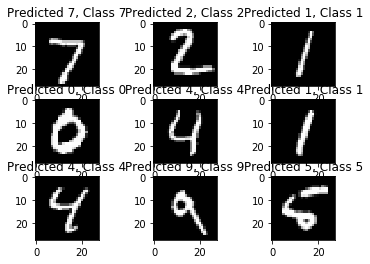

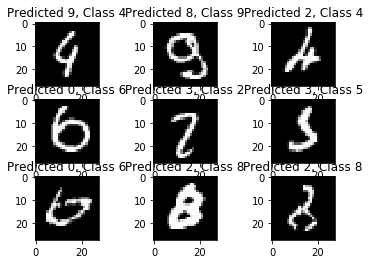

In [18]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))